In [1]:
#load modules
from matplotlib import pyplot as plt
import numpy as np
from spectral1d import solve_nonlinear_problem # needed module
from overscreening_breakdown import overscreening_breakdown #needed module
%matplotlib inline

In [2]:
#init the problem
problem = overscreening_breakdown()

In [3]:
#set up the solver
N = 100
domain = [0,np.inf]
tolerance = 1.0e-7
use_method = "newton"
L = 6
solver = solve_nonlinear_problem(N=N, domain=[0,np.inf], tolerance=tolerance, use_method=use_method)
solver.set_mapping_parameter(L)

In [4]:
#set up problem.
#If a parameter is not given, then a default value is used instead. See the source file of "overscreening_breakdown" for more details

sigma = 10.0
mu = 1
gamma = 1
delta = 10.0
u0 = 1.0
u0xxx = 0

def some_func(x):
    return u0*np.exp(-x**4)

problem.set_parameters(sigma = sigma, mu = mu, gamma = gamma, delta = delta, u0 = u0, u0xxx=u0xxx, initial_guess_solution=some_func)

In [5]:
#pass the problem to the solver
solver.set_problem(problem)

In [6]:
# solve the problem
c = solver.solve_problem()

newton: relative target tolerance =  1.0099504938362076e-06
newton: iteration  1 , residual norm  0.00017880318617095786 , wight =  1.0
newton: iteration  2 , residual norm  2.0995810522577122e-07 , wight =  1.0
converged with norm =  2.0995810522577122e-07


In [7]:
#optionally save and load a solution for further use
#solution is stored in expension coefficients
solver.save_solution("solution.pickle", c)
c1 = solver.load_data("solution.pickle")
print("checking difference in saved data: ", np.linalg.norm(c-c1))

checking difference in saved data:  0.0


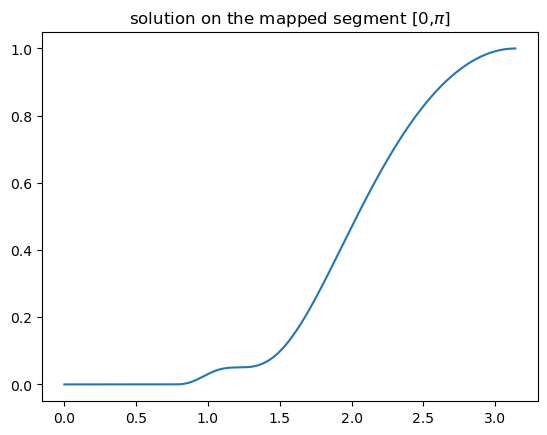

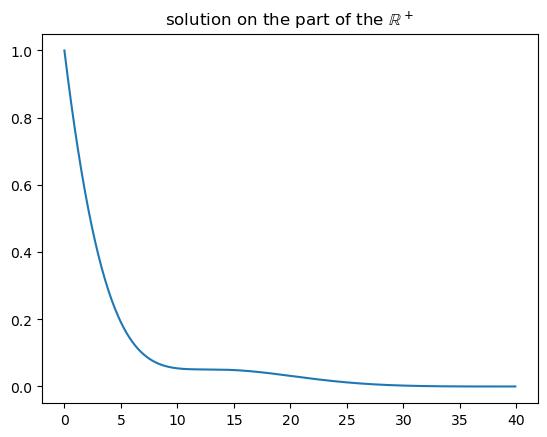

In [8]:
#see the solution
t = np.arange(0, np.pi, 0.01)
sol = solver.obtain_solution_in_basis(c, t)
plt.title("solution on the mapped segment [0,$\pi$]")
plt.plot(t, sol)
plt.show()
x = np.arange(0.0, 40.0, 0.1)
sol = solver.obtain_solution_in_domain(c, x)
plt.title("solution on the part of the $\mathbb{R}^+$")
plt.plot(x, sol)
plt.show()

Next we demonstrate the applicaiton of the size globalization for a very stiff problem using globalization in the size of the problem thanx to the natural behaviour of the spectral methods.

In [9]:
sigma = 10.0
mu = 1
gamma = 1/2
delta = 50.0
u0 = 200.0
u0xxx = 0

def some_func(x):
    return np.exp(-x**2) #initial guess should be u0*np.exp(-x**2). This breaks the problem convergence

problem.set_parameters(sigma = sigma, mu = mu, gamma = gamma, delta = delta, u0 = u0, u0xxx=u0xxx, initial_guess_solution=some_func)

In [10]:
# normal size problem fails to converge due to very stiff nonlinearity (artificially made)
N = 100
solver = solve_nonlinear_problem(N=N, domain=[0,np.inf], tolerance=tolerance, use_method=use_method, total_iterations = 20, use_globalization = False)
solver.set_mapping_parameter(L)
solver.set_problem(problem)
c = solver.solve_problem()

newton: relative target tolerance =  1.0099504938362076e-06
newton: failed to converge with norm:  nan  with wight:  0.5
failed to converge with norm =  19.80295085955572


/home/noctum/Documents/Programs/Unboundede_domain/repository/overscreening_breakdown.py:51: RuntimeWarning: overflow encountered in sinh
  num = (np.sinh(u) - self.__g_func(x)*0.5*self.__mu*np.exp(u) )*np.exp(-q*x)
/home/noctum/Documents/Programs/Unboundede_domain/repository/overscreening_breakdown.py:51: RuntimeWarning: overflow encountered in exp
  num = (np.sinh(u) - self.__g_func(x)*0.5*self.__mu*np.exp(u) )*np.exp(-q*x)
/home/noctum/Documents/Programs/Unboundede_domain/repository/overscreening_breakdown.py:51: RuntimeWarning: invalid value encountered in subtract
  num = (np.sinh(u) - self.__g_func(x)*0.5*self.__mu*np.exp(u) )*np.exp(-q*x)
/home/noctum/Documents/Programs/Unboundede_domain/repository/overscreening_breakdown.py:52: RuntimeWarning: overflow encountered in sinh
  din = (1 + 2.0*self.__gamma*np.sinh(u/2.0)**2)
/home/noctum/Documents/Programs/Unboundede_domain/repository/overscreening_breakdown.py:51: RuntimeWarning: invalid value encountered in multiply
  num = (np.sin

In [11]:
# we perfrom a set of iterations to update a better initial guess from the smaller problem size
N_base = 20
N = N_base
c1 = None
for it in range(2,11):
    print("running on N = ", N)
    solver = solve_nonlinear_problem(N=N, domain=[0,np.inf], tolerance=tolerance, use_method=use_method, total_iterations = 20, use_globalization = False)
    solver.set_mapping_parameter(L)
    solver.set_problem(problem)
    c = solver.solve_problem(c1)
    if solver.is_converged():
        c1 = np.copy(c)
        N = N_base*it
    else:
        N = N - 1

running on N =  20
newton: relative target tolerance =  4.6904157598234293e-07
newton: iteration  1 , residual norm  0.027949278593217795 , wight =  1.0
newton: iteration  2 , residual norm  0.0005847736267105601 , wight =  1.0
newton: iteration  3 , residual norm  1.2185466710156891e-05 , wight =  1.0
newton: iteration  4 , residual norm  2.5961927566237155e-06 , wight =  1.0
newton: iteration  5 , residual norm  2.5786453015996697e-07 , wight =  1.0
converged with norm =  2.5786453015996697e-07
running on N =  40


/home/noctum/Documents/Programs/Unboundede_domain/repository/spectral1d.py:63: RuntimeWarning: divide by zero encountered in true_divide
  y = 1/x


newton: relative target tolerance =  6.48074069840786e-07
newton: iteration  1 , residual norm  0.00032285507642984334 , wight =  1.0
newton: iteration  2 , residual norm  0.00017250496825291413 , wight =  1.0
newton: iteration  3 , residual norm  0.00017040333811527437 , wight =  1.0
newton: iteration  4 , residual norm  9.896361410975116e-05 , wight =  0.5
newton: iteration  5 , residual norm  7.79462468171799e-05 , wight =  1.0
newton: iteration  6 , residual norm  4.977786785638673e-07 , wight =  1.0
converged with norm =  4.977786785638673e-07
running on N =  60
newton: relative target tolerance =  7.87400787401181e-07
newton: iteration  1 , residual norm  3.312508350613082e-05 , wight =  1.0
newton: iteration  2 , residual norm  7.414063268813248e-07 , wight =  1.0
converged with norm =  7.414063268813248e-07
running on N =  80
newton: relative target tolerance =  9.055385138137417e-07
newton: iteration  1 , residual norm  3.989331824538937e-09 , wight =  1.0
converged with norm 

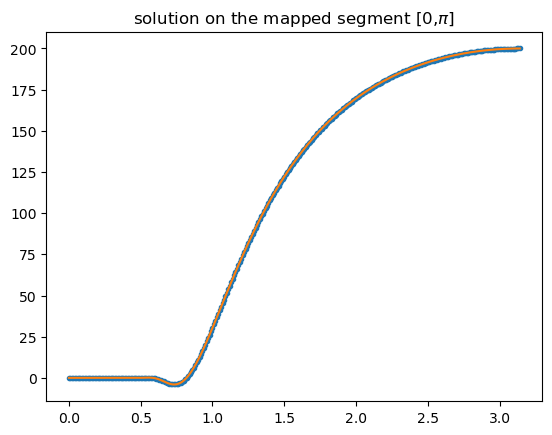

In [12]:
#and check 2 final consecutive solutions 
t = np.arange(0, np.pi, 0.01)
sol1 = solver.obtain_solution_in_basis(c1, t)
sol = solver.obtain_solution_in_basis(c, t)
plt.title("solution on the mapped segment [0,$\pi$]")
plt.plot(t, sol1, '.')
plt.plot(t, sol)
plt.show()

Next we demonstrate the applicaiton of the homotopy* globalization for the same stiff problem.

*https://en.wikipedia.org/wiki/Homotopy

In [13]:
solver = solve_nonlinear_problem(N=100, domain=[0,np.inf], tolerance=tolerance, use_method="newton", total_iterations = 20, use_globalization = True)
solver.set_mapping_parameter(L)
solver.set_problem(problem)

In [18]:
c2 = solver.solve_problem()

newton: relative target tolerance =  1.0099504938362076e-06
newton: iteration  1 , residual norm  2.578541123028821e-13 , wight =  1.0
converged with norm =  2.578541123028821e-13


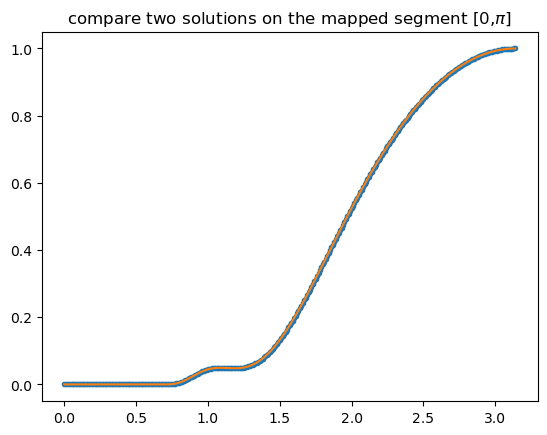

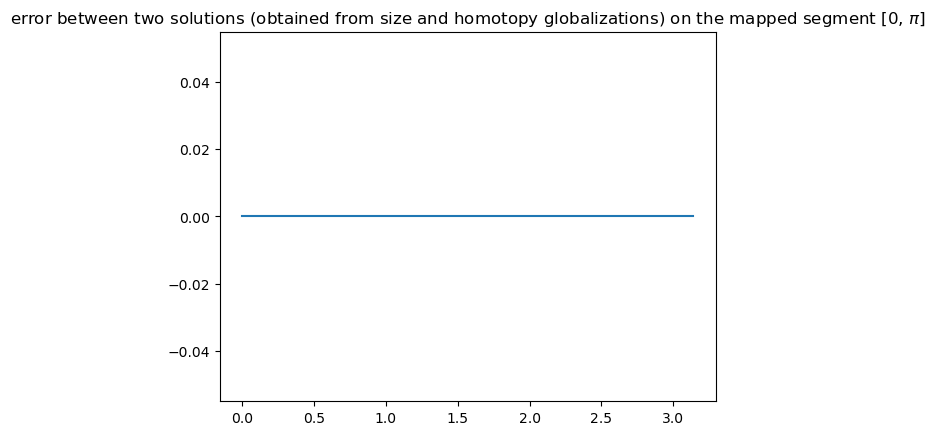

In [20]:
#and demonstrate the converged solution compared with the previous one
t = np.arange(0, np.pi, 0.01)
sol = solver.obtain_solution_in_basis(c1, t)
sol2 = solver.obtain_solution_in_basis(c2, t)
plt.title("compare two solutions on the mapped segment [0,$\pi$]")
plt.plot(t, sol2,'.')
plt.plot(t, sol)
plt.show()
plt.title("error between two solutions (obtained from size and homotopy globalizations) on the mapped segment [0, $\pi$]")
plt.plot(t, sol-sol2)
plt.show()

**Here we demonstrate how to find a stable value of the mapping parameter L for the given problem.**

One should choose the smallest possible value of L at which the solutions are stable w.r.t. the discretization

In [16]:
sigma = 10.0
mu = 1
gamma = 1/2
delta = 10.0
u0 = 1.0
u0xxx = 0

def some_func(x):
    return u0*np.exp(-x**2) #solution initial guess

problem.set_parameters(sigma = sigma, mu = mu, gamma = gamma, delta = delta, u0 = u0, u0xxx=u0xxx, initial_guess_solution=some_func)

newton: relative target tolerance =  5.656854249492381e-07
newton: iteration  1 , residual norm  0.00035901656655514246 , wight =  1.0
newton: iteration  2 , residual norm  9.808966115673217e-08 , wight =  1.0
converged with norm =  9.808966115673217e-08
newton: relative target tolerance =  8.485281374238569e-07
newton: iteration  1 , residual norm  0.00016316055982145347 , wight =  1.0
newton: iteration  2 , residual norm  4.461254847949605e-07 , wight =  1.0
converged with norm =  4.461254847949605e-07
newton: relative target tolerance =  9.055385138137417e-07
newton: iteration  1 , residual norm  1.3434635175402184e-06 , wight =  1.0
newton: iteration  2 , residual norm  1.8049478293740986e-08 , wight =  1.0
converged with norm =  1.8049478293740986e-08
newton: relative target tolerance =  1.0099504938362076e-06
newton: iteration  1 , residual norm  7.676390618832948e-08 , wight =  1.0
converged with norm =  7.676390618832948e-08


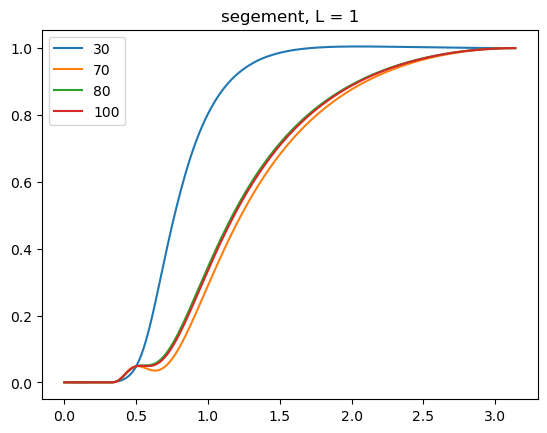

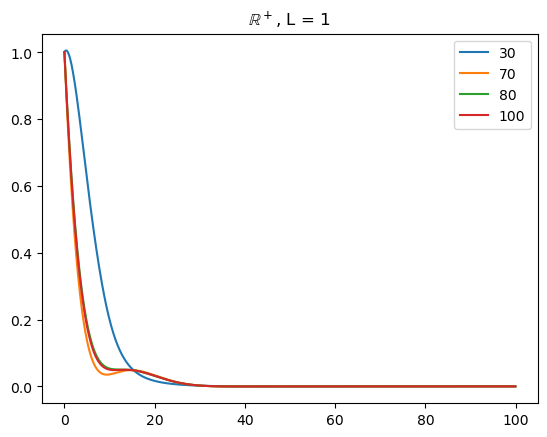

newton: relative target tolerance =  5.656854249492381e-07
newton: iteration  1 , residual norm  0.00010696792586387455 , wight =  1.0
newton: iteration  2 , residual norm  3.1934788789992775e-08 , wight =  1.0
converged with norm =  3.1934788789992775e-08
newton: relative target tolerance =  8.485281374238569e-07
newton: iteration  1 , residual norm  9.197441670441499e-07 , wight =  1.0
newton: iteration  2 , residual norm  9.772249300911382e-11 , wight =  1.0
converged with norm =  9.772249300911382e-11
newton: relative target tolerance =  9.055385138137417e-07
newton: iteration  1 , residual norm  4.497411259917346e-10 , wight =  1.0
converged with norm =  4.497411259917346e-10
newton: relative target tolerance =  1.0099504938362076e-06
newton: iteration  1 , residual norm  7.389316771105639e-10 , wight =  1.0
converged with norm =  7.389316771105639e-10


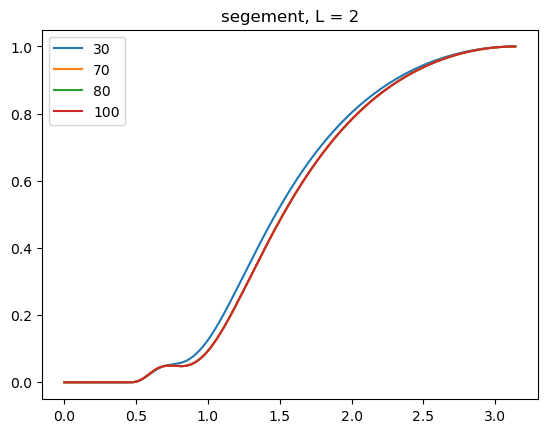

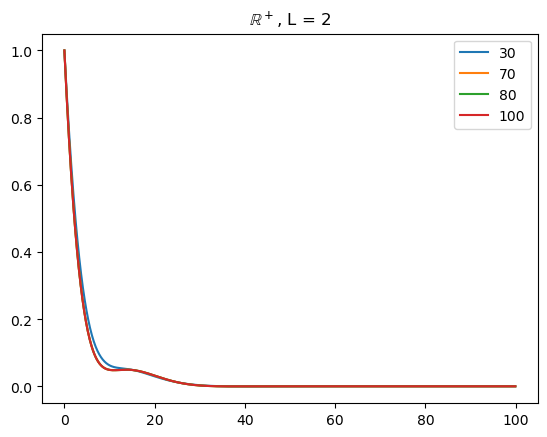

newton: relative target tolerance =  5.656854249492381e-07
newton: iteration  1 , residual norm  8.685090681447426e-05 , wight =  1.0
newton: iteration  2 , residual norm  2.8045006627520798e-08 , wight =  1.0
converged with norm =  2.8045006627520798e-08
newton: relative target tolerance =  8.485281374238569e-07
newton: iteration  1 , residual norm  4.517350342420241e-08 , wight =  1.0
converged with norm =  4.517350342420241e-08
newton: relative target tolerance =  9.055385138137417e-07
newton: iteration  1 , residual norm  1.524802128253308e-11 , wight =  1.0
converged with norm =  1.524802128253308e-11
newton: relative target tolerance =  1.0099504938362076e-06
newton: iteration  1 , residual norm  1.695889309624587e-11 , wight =  1.0
converged with norm =  1.695889309624587e-11


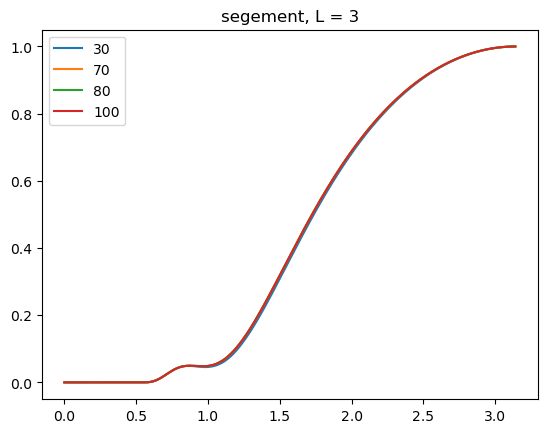

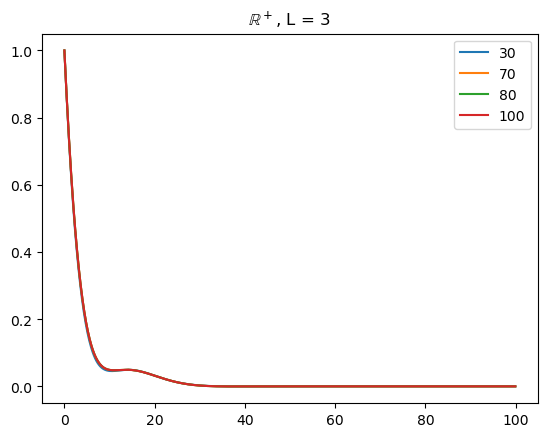

newton: relative target tolerance =  5.656854249492381e-07
newton: iteration  1 , residual norm  8.789434484218448e-05 , wight =  1.0
newton: iteration  2 , residual norm  2.8994259282858938e-08 , wight =  1.0
converged with norm =  2.8994259282858938e-08
newton: relative target tolerance =  8.485281374238569e-07
newton: iteration  1 , residual norm  3.302192065706251e-10 , wight =  1.0
converged with norm =  3.302192065706251e-10
newton: relative target tolerance =  9.055385138137417e-07
newton: iteration  1 , residual norm  2.7094047690007665e-12 , wight =  1.0
converged with norm =  2.7094047690007665e-12
newton: relative target tolerance =  1.0099504938362076e-06
newton: iteration  1 , residual norm  1.6568894942819027e-12 , wight =  1.0
converged with norm =  1.6568894942819027e-12


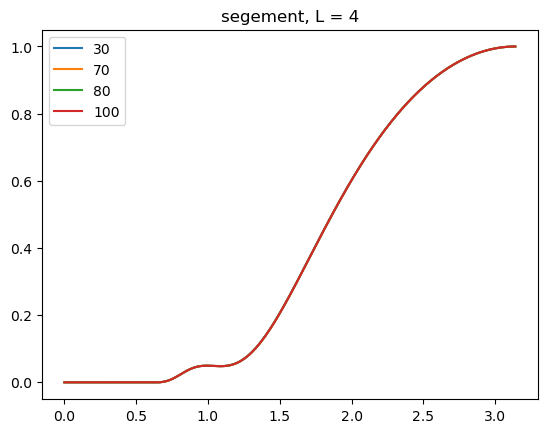

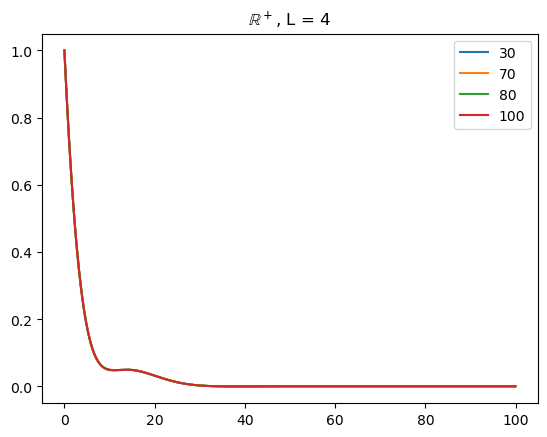

newton: relative target tolerance =  5.656854249492381e-07
newton: iteration  1 , residual norm  8.561033838113926e-05 , wight =  1.0
newton: iteration  2 , residual norm  2.8996668029138034e-08 , wight =  1.0
converged with norm =  2.8996668029138034e-08
newton: relative target tolerance =  8.485281374238569e-07
newton: iteration  1 , residual norm  3.2632426948663937e-10 , wight =  1.0
converged with norm =  3.2632426948663937e-10
newton: relative target tolerance =  9.055385138137417e-07
newton: iteration  1 , residual norm  5.18336146491021e-13 , wight =  1.0
converged with norm =  5.18336146491021e-13
newton: relative target tolerance =  1.0099504938362076e-06
newton: iteration  1 , residual norm  2.578541123028821e-13 , wight =  1.0
converged with norm =  2.578541123028821e-13


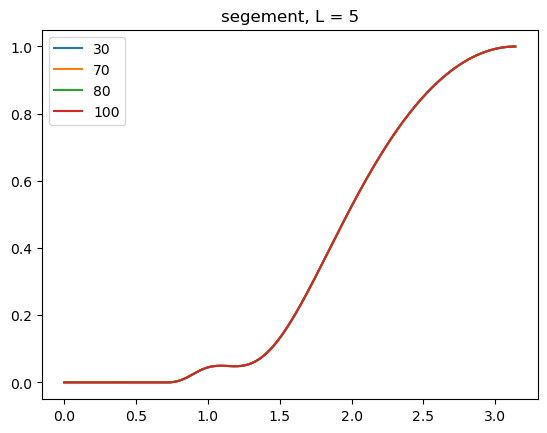

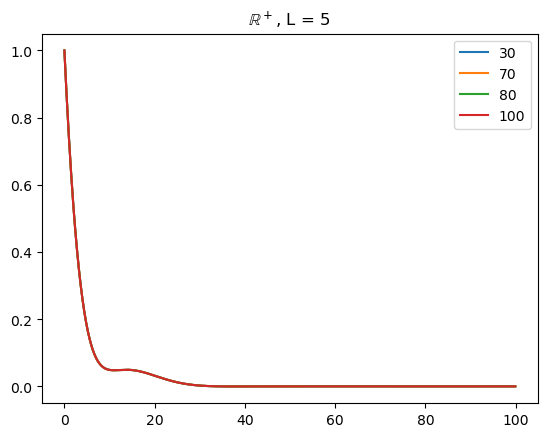

For this problem it is recomended to use L=4.


In [17]:
Nall = [30,70,80,100]
Lall = [1,2,3,4,5]
t = np.arange(0, np.pi, 0.01)
x = np.arange(0, 100, 0.1)
for L in Lall:
    c_dict = {}
    c1 = None
    for N in Nall:
        solver = solve_nonlinear_problem(N=N, domain=[0,np.inf], tolerance=tolerance, use_method="newton", total_iterations = 20, use_globalization = False)
        solver.set_mapping_parameter(L)
        solver.set_problem(problem)
        c = solver.solve_problem(c1)
        c_dict[N] = c
        c1 = np.copy(c)
    for N in Nall:
        c_l = c_dict[N]
        sol = solver.obtain_solution_in_basis(c_l, t)
        plt.plot(t, sol, label=N)
        
    plt.legend()
    plt.title("segement, L = " + str(L))
    plt.show()
    
    for N in Nall:
        c_l = c_dict[N]
        sol = solver.obtain_solution_in_domain(c_l, x)
        plt.plot(x, sol, label=N)
        
    plt.legend()
    plt.title("$\mathbb{R}^+$, L = " + str(L))
    plt.show()    
    
print("For this problem it is recomended to use L=4.")